# Pipeline 1

## Load the data

In [5]:
!pip install surprise

In [6]:
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import train_test_split, cross_validate,KFold
import time
from sklearn.pipeline import Pipeline

In [7]:
from surprise import Dataset

data = Dataset.load_builtin('ml-100k')

In [8]:
from surprise import Reader
from pathlib import Path
import pandas as pd


reader = Reader(line_format = 'user item rating timestamp', sep=',', skip_lines=1)
rating_data = Dataset.load_from_file('ratings.csv', reader)
rating_data


In [9]:
mean_rmse = list()
mean_mae = list()
exec_times = list()

## Train-Test Split Data

In [10]:
from surprise.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
test

[('907', '143', 5.0),
 ('371', '210', 4.0),
 ('218', '42', 4.0),
 ('829', '170', 4.0),
 ('733', '277', 1.0),
 ('363', '1512', 1.0),
 ('193', '487', 5.0),
 ('808', '313', 5.0),
 ('557', '682', 2.0),
 ('774', '196', 3.0),
 ('638', '118', 3.0),
 ('632', '81', 5.0),
 ('417', '200', 4.0),
 ('580', '471', 3.0),
 ('640', '91', 4.0),
 ('450', '328', 4.0),
 ('596', '13', 2.0),
 ('586', '467', 4.0),
 ('653', '502', 2.0),
 ('378', '517', 3.0),
 ('405', '65', 1.0),
 ('279', '399', 4.0),
 ('327', '293', 3.0),
 ('346', '276', 1.0),
 ('59', '928', 4.0),
 ('514', '22', 4.0),
 ('807', '402', 5.0),
 ('473', '327', 3.0),
 ('342', '324', 1.0),
 ('269', '136', 4.0),
 ('654', '1', 4.0),
 ('250', '28', 4.0),
 ('282', '689', 2.0),
 ('534', '619', 4.0),
 ('194', '481', 3.0),
 ('184', '118', 2.0),
 ('291', '739', 3.0),
 ('293', '31', 2.0),
 ('943', '1028', 2.0),
 ('65', '69', 3.0),
 ('562', '135', 5.0),
 ('466', '62', 3.0),
 ('847', '317', 3.0),
 ('650', '521', 3.0),
 ('656', '326', 1.0),
 ('366', '53', 5.0),
 

In [12]:
train.n_users, train.n_items

(943, 1651)

## Train Model

In [13]:
from surprise import SVD

model = SVD()

In [14]:
model.fit(train)

## Make Prediction

In [15]:
predictions = model.test(test)
predictions

[Prediction(uid='907', iid='143', r_ui=5.0, est=5, details={'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.160506762395598, details={'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.5594380770732696, details={'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=3.9648820254043002, details={'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=3.195850653715035, details={'was_impossible': False}),
 Prediction(uid='363', iid='1512', r_ui=1.0, est=3.228881696961246, details={'was_impossible': False}),
 Prediction(uid='193', iid='487', r_ui=5.0, est=3.88131774222168, details={'was_impossible': False}),
 Prediction(uid='808', iid='313', r_ui=5.0, est=4.603261835546773, details={'was_impossible': False}),
 Prediction(uid='557', iid='682', r_ui=2.0, est=3.3896215539240147, details={'was_impossible': False}),
 Prediction(uid='774', iid='196', r_ui=3.0, est=2.454852015032052, details={'was_imposs

## Evaluation

In [16]:
from surprise import accuracy

accuracy.rmse(predictions=predictions)

RMSE: 0.9351


0.935066387657892

In [17]:
accuracy.mae(predictions=predictions)

MAE:  0.7359


0.7359413566558395

# Pipeline 2

## Cross Validation

In [18]:
from surprise.model_selection import cross_validate

cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9399  0.9424  0.9330  0.9323  0.9331  0.9361  0.0042  
MAE (testset)     0.7409  0.7453  0.7351  0.7350  0.7340  0.7380  0.0043  
Fit time          7.78    6.23    6.44    6.30    6.36    6.62    0.58    
Test time         0.21    0.29    0.20    0.29    0.21    0.24    0.04    


{'test_rmse': array([0.93987193, 0.94241393, 0.93300967, 0.93228424, 0.933116  ]),
 'test_mae': array([0.74085196, 0.74525368, 0.73513699, 0.73495575, 0.73398975]),
 'fit_time': (7.777031898498535,
  6.232057809829712,
  6.436807870864868,
  6.301093816757202,
  6.357882976531982),
 'test_time': (0.21014189720153809,
  0.290895938873291,
  0.20087504386901855,
  0.2904818058013916,
  0.21018481254577637)}

In [19]:
from surprise.prediction_algorithms.knns import KNNBasic

opts = {'name': 'pearson_baseline', 'user_based':True}
model = KNNBasic(sim_options=opts)

In [20]:
model.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [21]:
pred = model.test(test)

display(accuracy.rmse(pred))
display(accuracy.mae(pred))

RMSE: 1.0008


1.0007997542372822

MAE:  0.7897


0.7897024955421307

In [22]:
opts = {'name': 'pearson_baseline', 'user_based': False} 
item_model = KNNBasic(sim_options=opts)

In [23]:
item_model.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [24]:
pred1 = item_model.test(test)

display(accuracy.rmse(pred))
display(accuracy.mae(pred))

RMSE: 1.0008


1.0007997542372822

MAE:  0.7897


0.7897024955421307

In [25]:
!pip install seaborn

In [26]:
import numpy as np
start = time.time()
cval_res = cross_validate(model,rating_data, measures=['RMSE', 'MAE'], cv=KFold(5, random_state=0), verbose=False)
exec_time = time.time() - start
exec_times.append(exec_time)
mean_rmse.append(np.mean(cval_res['test_rmse']))
mean_mae.append(np.mean(cval_res['test_mae']))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


# Benchmark

In [34]:
import pandas as pd

a={'mae': mean_mae, 'rmse': mean_rmse, 'exec_time': exec_times, 
                            'model': ['svm', 'user_based_collaborative_filtering', 'item_based_collaborative_filtering']}

baseline_df = pd.DataFrame.from_dict(a, orient='index')
baseline_df = baseline_df.transpose()


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

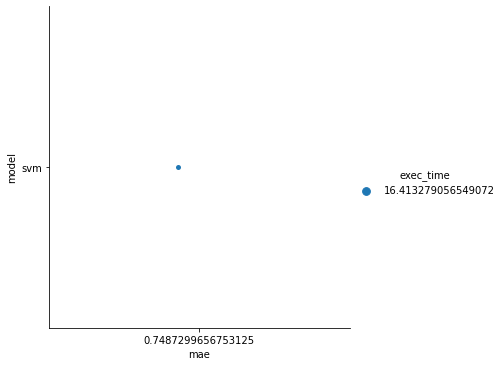

In [51]:
sns.catplot(x="mae", y="model",hue="exec_time", data=baseline_df)

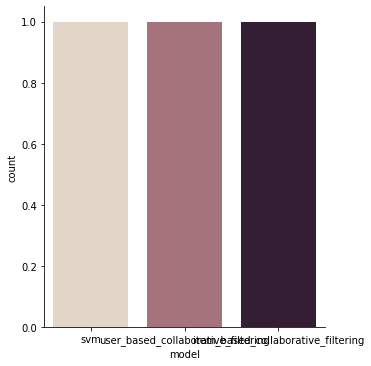

In [52]:
sns.catplot(x="model", kind="count", palette="ch:.25", data=baseline_df)

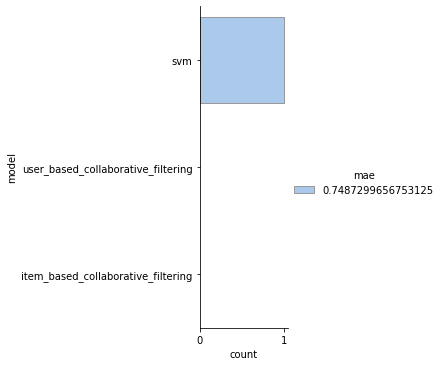

In [55]:
sns.catplot(y="model", hue="mae", kind="count",
            palette="pastel", edgecolor=".6",
            data=baseline_df)